Nama Anggota Kelompok :
- Luqman Hakim (PYTN - KS06 - 003)
- Fellysia Devi Pramono (PYTN - KS06 - 006)
<br>
---
<br>

# Project Introduction

**Project Overview**<br>
Data ini memiliki 18 atribut yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan.<br><br>
**Atribut Information**<br>
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

# Import Library dan Load Data

In [ ]:
!pip install yellowbrick

In [1]:
## import library yang dibutuhkan

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('dataset/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# EDA

In [3]:
data.shape

(8950, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dataset ini memiliki 18 kolom dan 8950 baris, dengan 14 tipe data float, 3 tipe data integer, dan 1 tipe data object

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df = data.copy()
df = df.drop(columns='CUST_ID', axis=1)
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


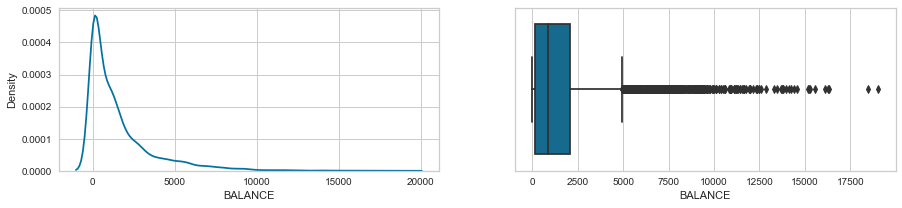

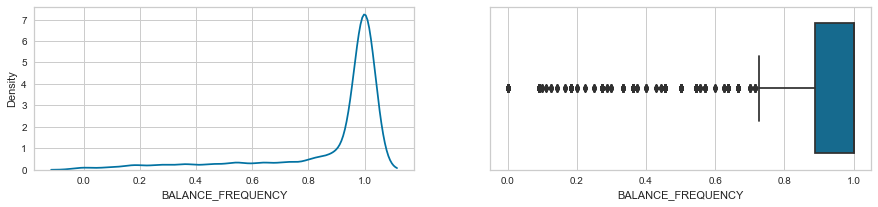

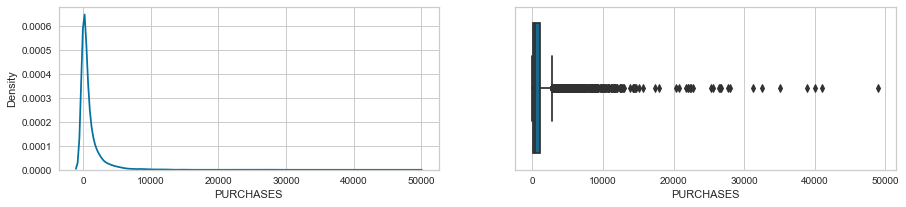

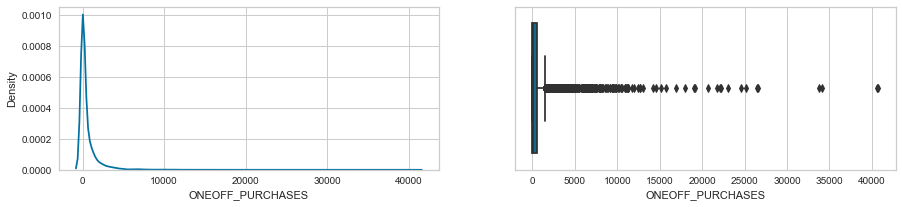

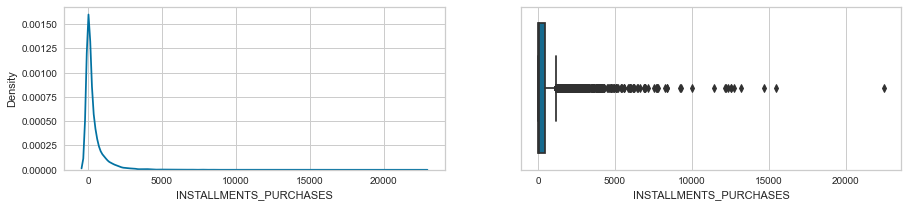

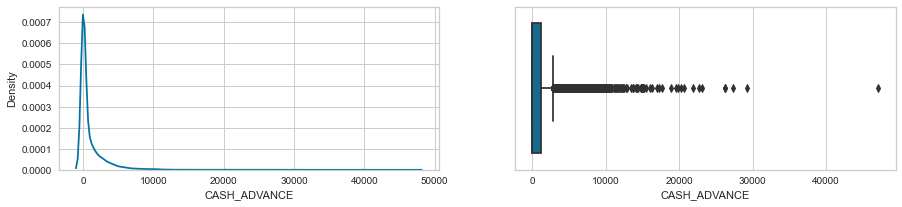

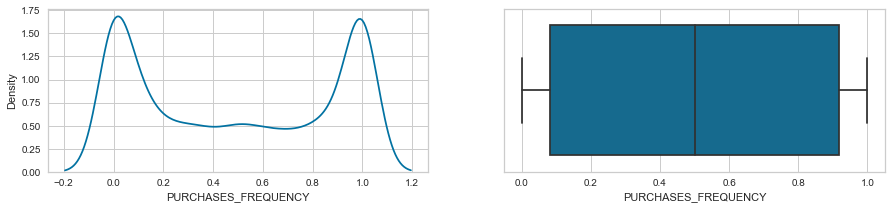

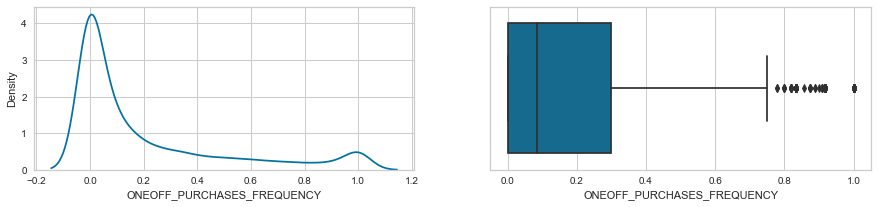

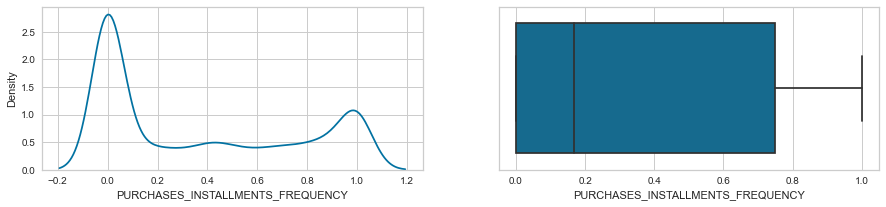

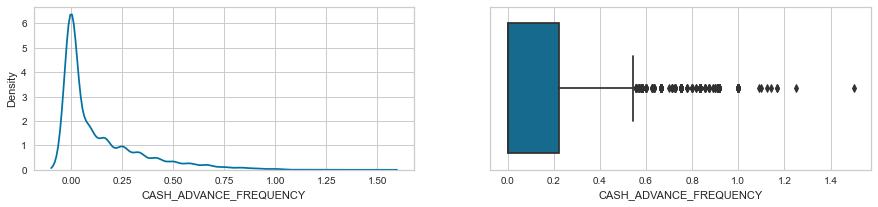

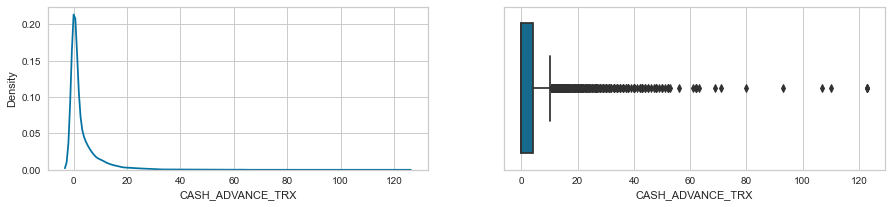

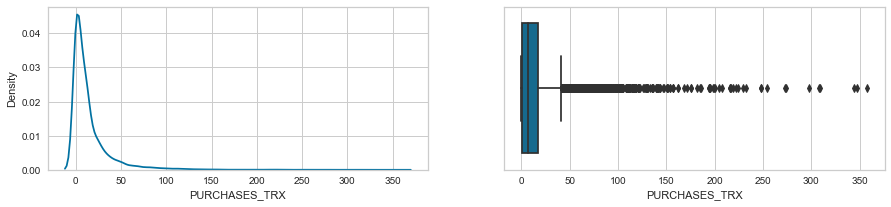

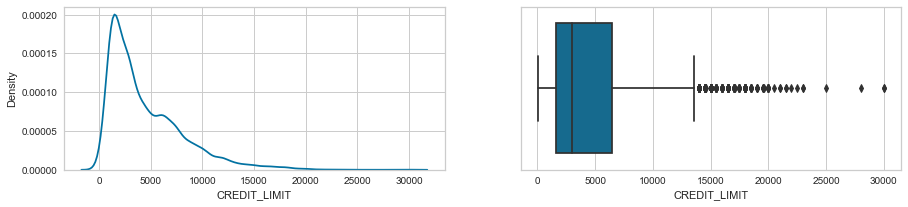

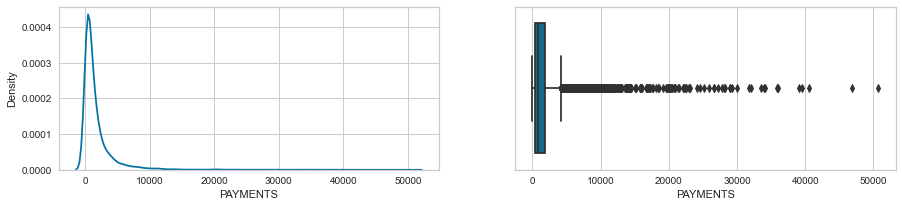

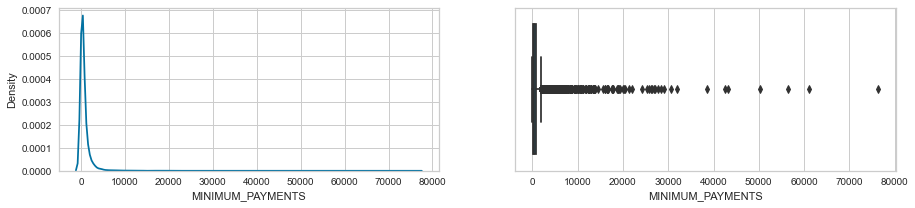

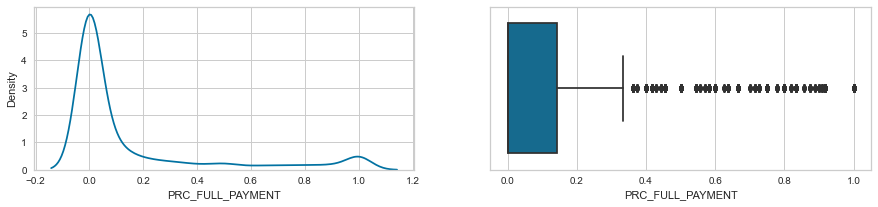

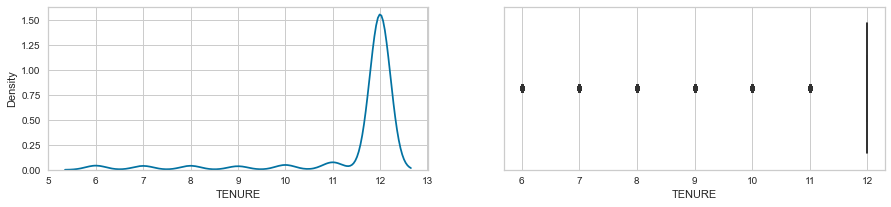

In [7]:
for cols in df.columns:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sb.kdeplot(df[cols], ax=axs[0])
    sb.boxplot(df[cols], ax=axs[1])

Dari rangkuman grafik diatas dapat disimpulkan bahwa data kita memiliki banyak sekali outlier, maka pada proses data preprocessing nanti diperlukan proses untuk handling outlier yang ada agar setidaknya dapat membantu model machine learning untuk mengolahnya.

# Data Preprocessing 

## Data Cleansing

### Dealing with missing values 

In [8]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Dealing with outlier

Dalam mengatasi outlier disini kita tidak akan melakukan impute pada tiap outlier yang ada karena bisa jadi data tersebut merupakan data yang penting untuk proses modeling dan kita tidak mau kehilangan banyak data, maka daripada kita melakukan impute pada outlier, kita akan mengatur value range pada feature dengan mengganti valuenya berdasarkan angka yang mewakili skala tertentu.

In [10]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for col in columns:
    Range = col + '_RANGE'
    df[Range] = 0        
    df.loc[((df[col] > 0) & (df[col] <= 500)), Range] = 1
    df.loc[((df[col] > 500) & (df[col] <= 1000)), Range] = 2
    df.loc[((df[col] > 1000) & (df[col] <= 5000)), Range] = 3
    df.loc[((df[col] > 5000) & (df[col] <= 10000)), Range] = 4
    df.loc[((df[col] > 10000)), Range] = 5 

In [11]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for col in columns:
    Range = col + '_RANGE'
    df[Range] = 0
    df.loc[((df[col] > 0) & (df[col] <= 0.1)), Range] = 1
    df.loc[((df[col] > 0.1) & (df[col] <= 0.2)), Range] = 2
    df.loc[((df[col] > 0.2) & (df[col] <= 0.3)), Range] = 3
    df.loc[((df[col] > 0.3) & (df[col] <= 0.4)), Range] = 4
    df.loc[((df[col] > 0.4) & (df[col] <= 0.5)), Range] = 5
    df.loc[((df[col] > 0.5) & (df[col] <= 0.6)), Range] = 6
    df.loc[((df[col] > 0.6) & (df[col] <= 0.7)), Range] = 7
    df.loc[((df[col] > 0.7) & (df[col] <= 0.8)), Range] = 8
    df.loc[((df[col] > 0.8) & (df[col] <= 0.9)), Range] = 9
    df.loc[((df[col] > 0.9) & (df[col] <= 1.0)), Range] = 10

In [12]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for col in columns:
    Range = col + '_RANGE'
    df[Range] = 0
    df.loc[((df[col] > 0) & (df[col] <= 25)), Range] = 1
    df.loc[((df[col] > 25) & (df[col] <= 50)), Range] = 2
    df.loc[((df[col] > 50) & (df[col] <= 75)), Range] = 3
    df.loc[((df[col] > 75) & (df[col] <= 100)), Range] = 4
    df.loc[((df[col] > 100)), Range] = 5

In [13]:
df.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

## Scaling data

In [14]:
x = np.asarray(df.copy())

In [15]:
scale = StandardScaler()
x = scale.fit_transform(x)
x_scaled = pd.DataFrame(x, columns=df.columns)

In [16]:
x_scaled.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,0.36068,-1.050961,-0.428579,-0.836545,0.071309,-0.823573,-1.647399,-1.124189,-0.682341,0.030404,-0.771610,-0.708951,-0.694434,-0.708130,-0.541199,-0.048236,-0.917694
1,0.36068,0.813479,-1.264444,-0.836545,-0.895688,2.069275,0.905492,0.765648,1.585794,0.472155,-1.264994,-0.708951,-0.939271,0.690317,0.452999,-1.143951,0.909934
2,0.36068,0.813479,0.407286,0.875962,-0.895688,-0.823573,0.905492,-0.179270,0.451726,0.472155,1.201929,2.515681,-0.939271,-0.708130,-0.541199,-0.048236,-0.917694
3,0.36068,0.813479,1.243151,1.732216,-0.895688,-0.100361,0.905492,-2.069107,-0.682341,-0.853097,-1.018302,-0.386487,-0.939271,-0.241981,-0.541199,-0.048236,0.909934
4,0.36068,-0.118741,-0.428579,0.019708,-0.895688,-0.823573,-0.370954,-0.179270,-0.682341,0.472155,-1.018302,-0.386487,-0.939271,-0.708130,-0.541199,-0.048236,-0.917694


# Membangun model cluster

## Menentukan nilai K

Untuk menentukan nilai k disini menggunakan library yellowbrick agar lebih cepat dan lebih singkat untuk code-nya

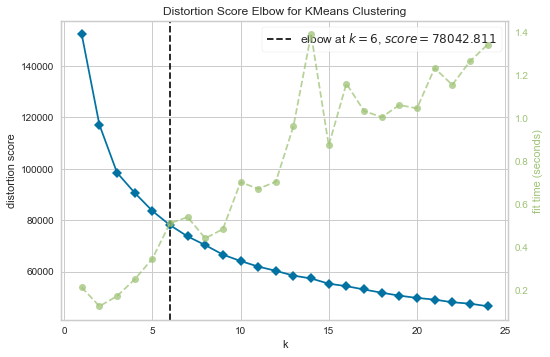

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
model = KMeans(random_state=42)
viz = KElbowVisualizer(model, k=(1,25))

viz.fit(x_scaled)
viz.show()

Dari visualisasi grafik elbow diatas dapat disimpulkan bahwa nilai k terbaik untuk data ini adalah __6__

## Membangun model cluster berdasarkan k value yang telah didapatkan sebelumnya

In [18]:
kmean = KMeans(viz.elbow_value_, random_state=42)
kmean.fit(x)
labels = kmean.labels_
# labels = kmean.fit_predict(x)

Menambahkan kolom label yang berisi hasil prediksi clustering menggunakan K-Means

In [19]:
df['labels'] = labels
x_scaled['labels'] = labels

#### Melihat persebaran cluster

<AxesSubplot:ylabel='labels'>

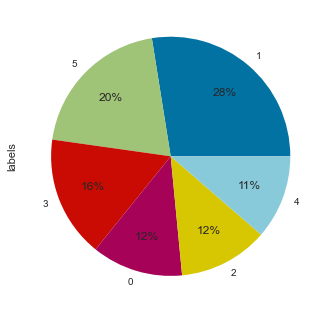

In [20]:
x_scaled.labels.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

Dari diagram pie diatas dapat disimpulkan bahwa __label 1__ merupakan kelompok cluster yang memiliki jumlah anggota paling banyak yaitu __28%__, diikuti dengan __label 5__ sebagai kelompok cluster dengan jumlah anggota paling banyak kedua yaitu __20%__, lalu __label 3__ di urutan ketiga dengan __16%__, __label 0__ dan __label 2__ di urutan keempat dengan __12%__, dan __label 4__ sebagai yang paling sedikit dengan __11%__. 

#### Membuat visualisasi untuk menginterpretasikan tiap cluster yang ada

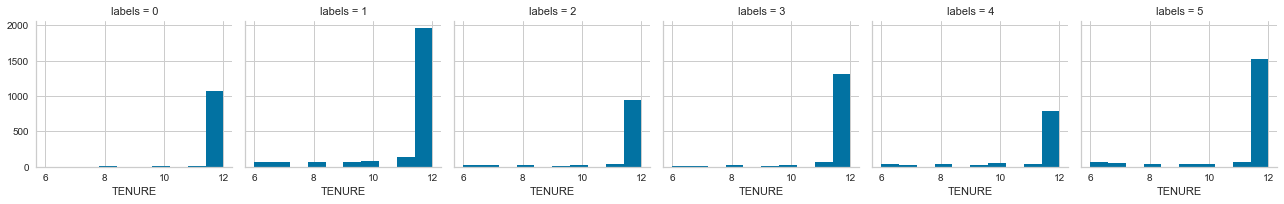

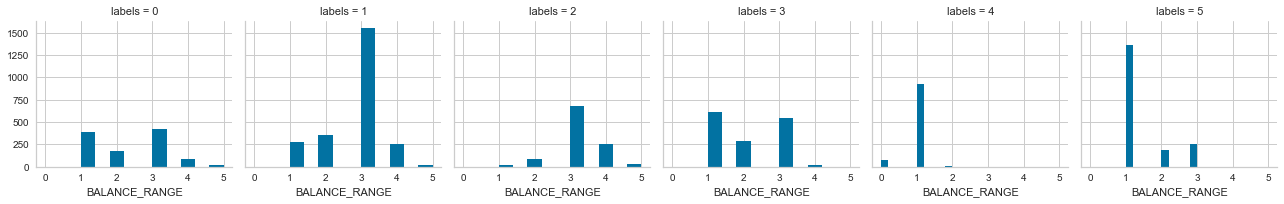

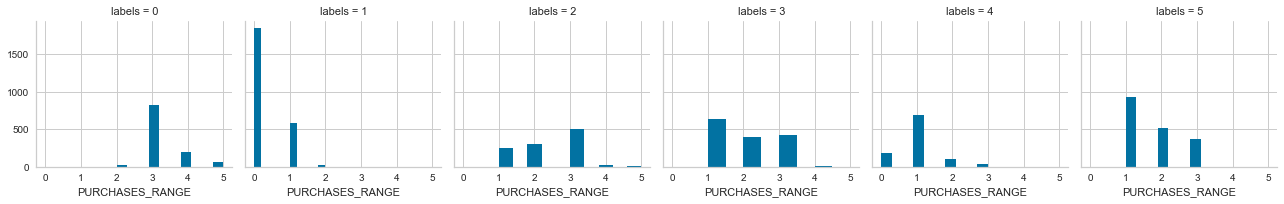

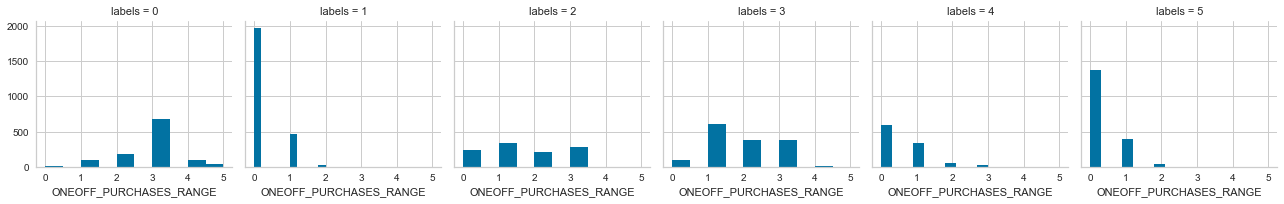

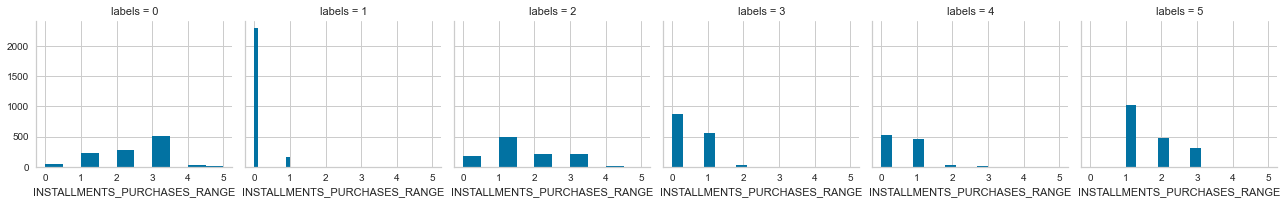

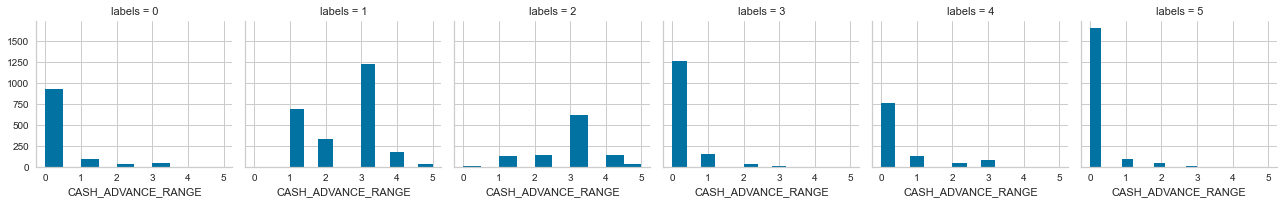

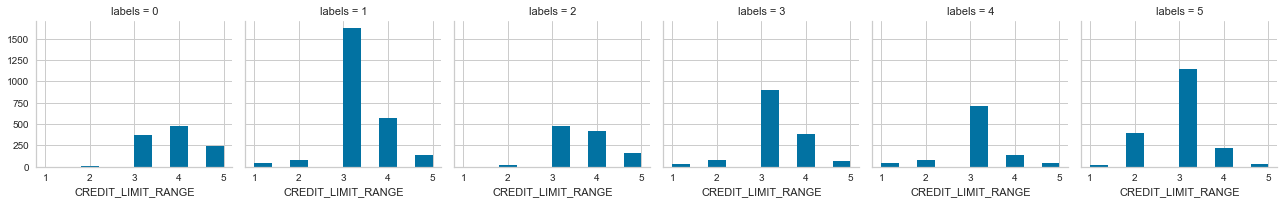

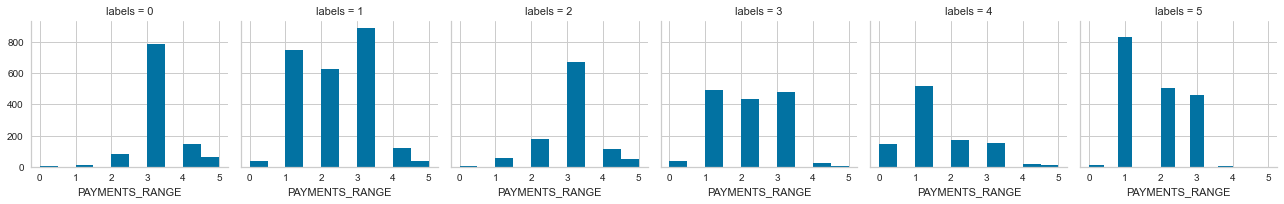

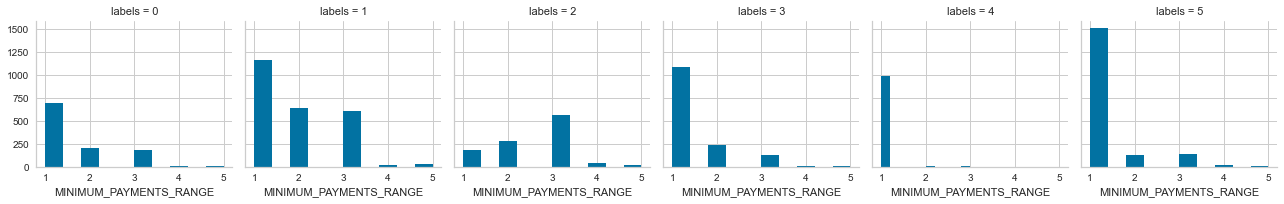

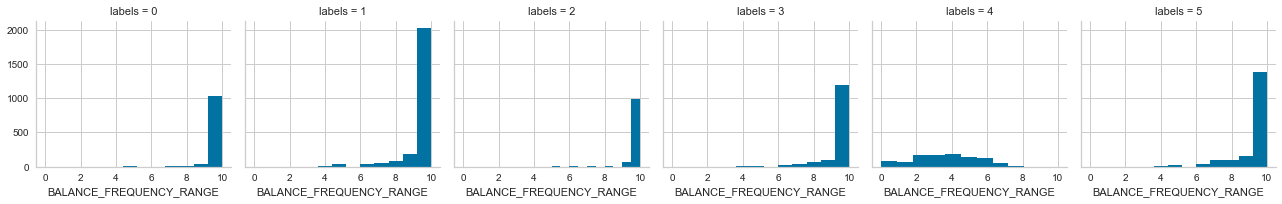

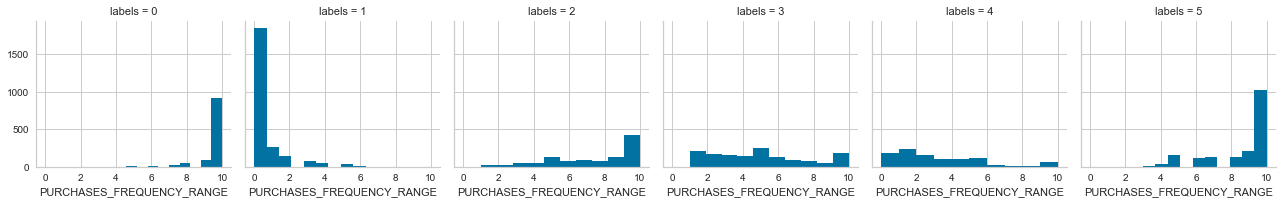

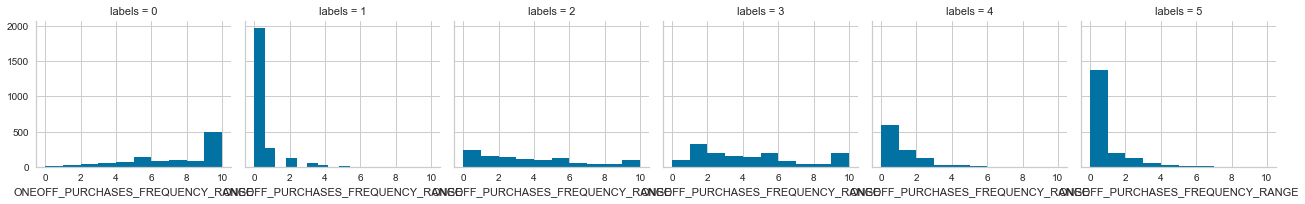

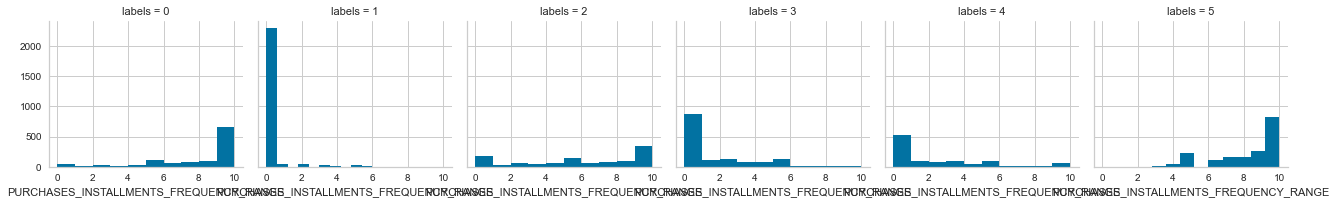

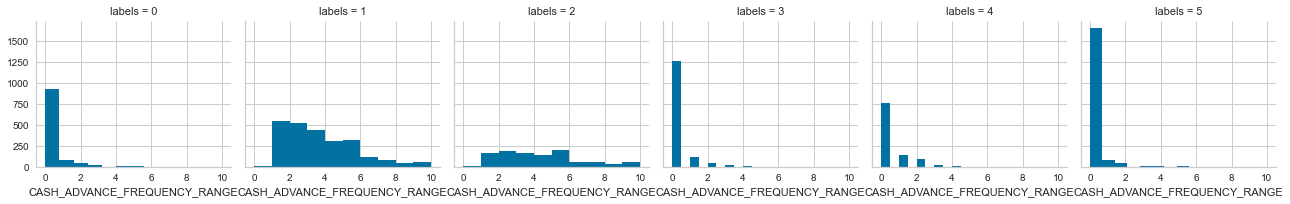

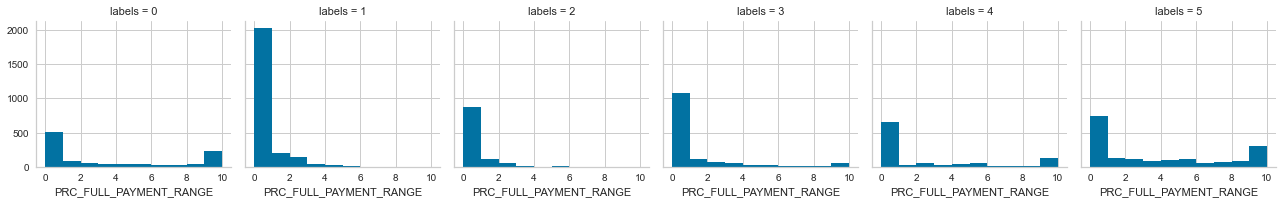

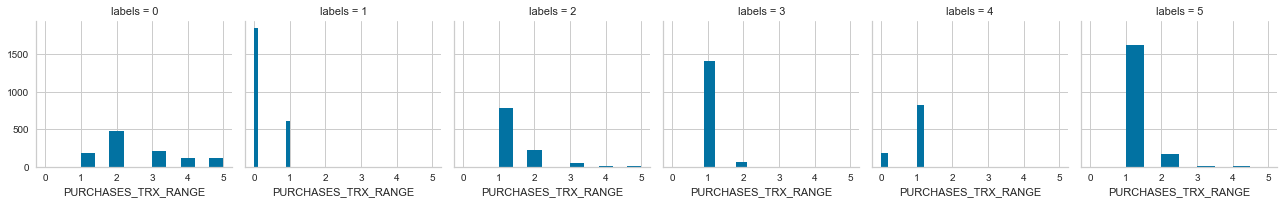

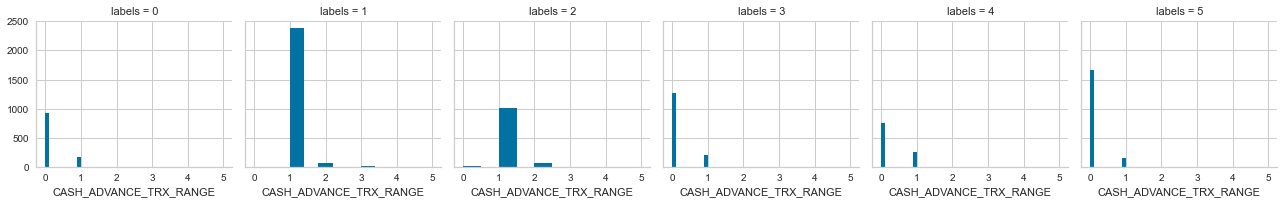

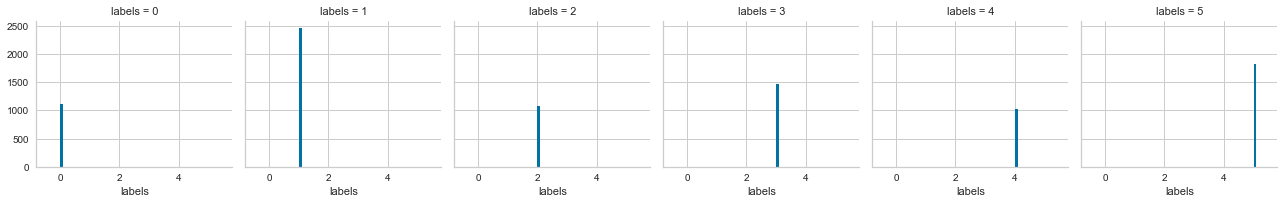

In [21]:
for col in df:
    grid= sb.FacetGrid(df, col='labels')
    grid.map(plt.hist, col)

dari visualisasi grafik diatas dapat disimpulkan bahwa :
- __label 0__ merupakan orang-orang yang memiliki credit limit \\$1000 - \\$5000 dan sering melakukan transaksi, metode transaksi yang digunakan rata-rata adalah sekali jalan dan menyicil pada rentan harga \\$1000 - \\$5000.

- __label 1__ merupakan orang-orang yang memiliki credit limit \\$1000 - \\$10000 dan jarang melakukan transaksi, metode transaksi yang  digunakan rata-rata adalah uang muka pada rentan harga \\$500 - \\$1000.

- __label 2__ merupakan orang-orang yang memiliki credit limit \\$1000 - \\$10000 dan sering melakukan transaksi, metode transaksi yang digunakan rata-rata adalah menyicil dan uang muka pada rentan harga \\$1 - \\$5000.

- __label 3__ merupakan orang-orang yang memiliki credit limit \\$1000 - \\$10000 dan cukup jarang melakukan transaksi, metode transaksi yang digunakan rata-rata adalah sekali jalan pada rentan harga \\$1 - \\$5000.

- __label 4__ merupakan orang-orang yang memiliki credit limit \\$1000 - \\$5000 dan cukup jarang melakukan transaksi, metode transaksi yang digunakan rata-rata adalah sekali jalan dan menyicil pada rentan harga \\$500 - \\$1000.

- __label 5__ merupakan orang-orang yang memiliki credit limit \\$1000 - \\$5000 dan sering melakukan transaksi, metode transaksi yang digunakan rata-rata adalah menyicil pada rentan harga \\$1 - \\$5000.

#### Membuat visualisasi untuk cluster dengan melakukan PCA pada model untuk me-*reduce* dimensinya

In [22]:
pca = PCA(2)
x_pca = x_scaled.copy()

pca.fit(x_pca)
x_pca = pca.transform(x_pca)
x_pca.shape

(8950, 2)

In [23]:
x, y = x_pca[:, 0], x_pca[:, 1]
  
viz_cluster = pd.DataFrame({'x': x, 'y':y, 'labels':labels}) 
groups = viz_cluster.groupby('labels')

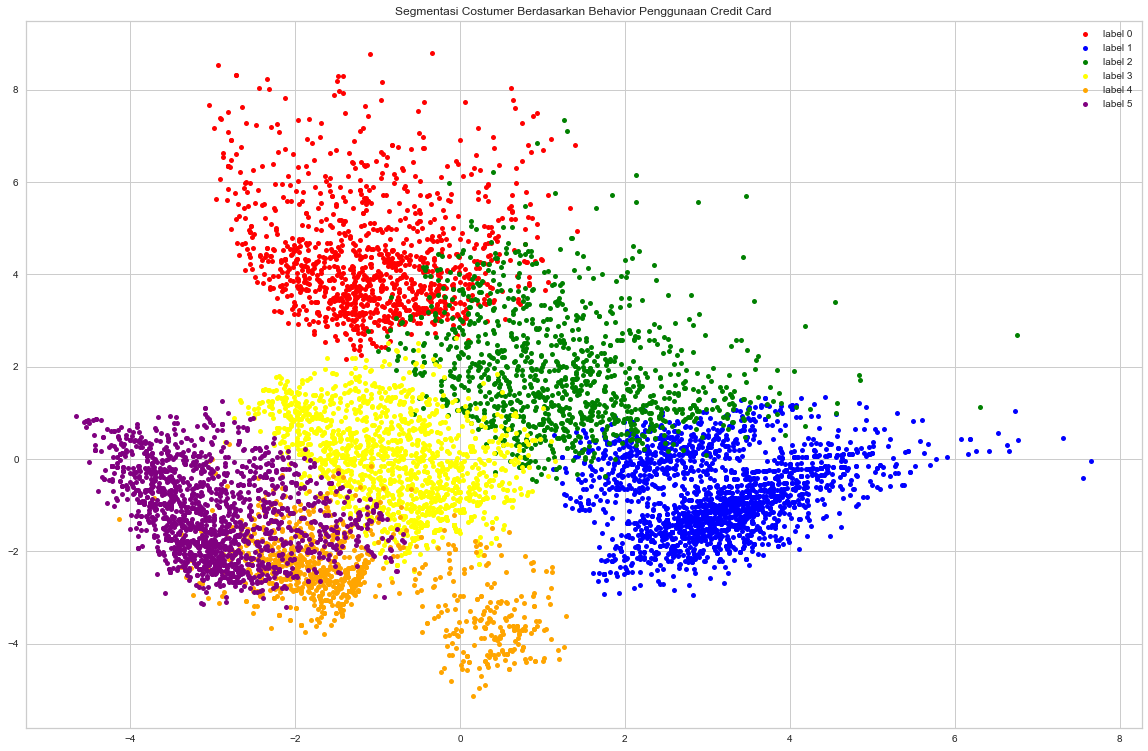

In [24]:
colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple'}

names = {0: 'label 0', 
         1: 'label 1', 
         2: 'label 2', 
         3: 'label 3', 
         4: 'label 4',
         5: 'label 5'}

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title('Segmentasi Costumer Berdasarkan Behavior Penggunaan Credit Card')
plt.show()

# Evaluate model

Untuk melihat seberapa baik model clustering yang telah kita buat, kita dapat mengevaluasinya menggunakan 2 cara berikut:
- __Davis-Bouldin Index__ <br>Davis-Bouldin Index merupakan rata-rata kesamaan antara setiap cluster dengan cluster terdekatnya. Jika angka semakin mendekati 0 berarti model cluster yang telah kita buat sudah bagus.
- __Silhouette Coefficient__ <br> Silhouette Coefficient adalah cara untuk mengecek seberapa padat dan terpisah dengan baik sebuah cluster. Jika angka semakin mendekati 1 berarti model yang dimiliki semakin baik.

In [25]:
print(f'Davies-Bouldin Index = {davies_bouldin_score(x_scaled, labels)}')
print(f'Silhouette Score = {silhouette_score(x_scaled, labels)}')

Davies-Bouldin Index = 1.4819105679580142
Silhouette Score = 0.25570456977230643


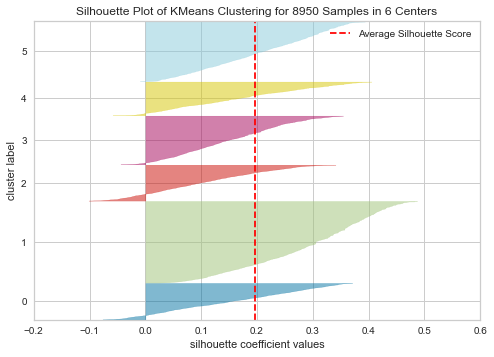

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
viz_sil = SilhouetteVisualizer(kmean, colors='yellowbrick')
viz_sil.fit(x_scaled.drop(columns='labels', axis=1))
viz_sil.show()

Dari proses Evaluasi model diatas, dapat disimpulkan bahwa model yang dibuat sudah cukup baik, karena dari metode Davies-Bouldin Index menunjukan angka 1.5 yang mana hampir mendekati 0, dan juga dari grafik silhouette dengan menggunakan SilhouetteVisualizer menunjukkan bahwa semua cluster label telah melewati garis average silhouette score, yang menandakan model yang kita miliki sudah cukup baik.

# Model Inference

In [ ]:
def range_amount(args):
    if args == 0:
        val.append(0)
    elif args > 0 and args <= 500:
        val.append(1)
    elif args > 500 and args <= 1000:
        val.append(2)
    elif args > 1000 and args <= 5000:
        val.append(3)
    elif args > 5000 and args <= 10000:
        val.append(4)
    elif args > 10000:
        val.append(5)
    else:
        print('Input Data is not valid, please re-input the data')
        
def range_freq(args):
    if args == 0:
        val.append(0)
    elif args > 0 and args <= 0.1:
        val.append(1)
    elif args > 0.1 and args <= 0.2:
        val.append(2)
    elif args > 0.2 and args <= 0.3:
        val.append(3)
    elif args > 0.3 and args <= 0.4:
        val.append(4)
    elif args > 0.4 and args <= 0.5:
        val.append(5)
    elif args > 0.5 and args <= 0.6:
        val.append(6)
    elif args > 0.6 and args <= 0.7:
        val.append(7)
    elif args > 0.7 and args <= 0.8:
        val.append(8)
    elif args > 0.8 and args <= 0.9:
        val.append(9)
    elif args > 0.9 and args <= 1.0:
        val.append(10)
    else:
        print('Input Data is not valid, please re-input the data')  

def range_trx(args):
    if args == 0:
        val.append(0)
    elif args > 0 and args <= 25:
        val.append(1)
    elif args > 25 and args <= 50:
        val.append(2)
    elif args > 50 and args <= 75:
        val.append(3)
    elif args > 75 and args <= 100:
        val.append(4)
    elif args > 100:
        val.append(5)
    else:
        print('Input Data is not valid, please re-input the data')

tenure = float(input('Tenure:'))
balance = float(input('Balance:'))
purchases = float(input('Purchases Amount:'))
oneoff_purchases = float(input('ONEOFF Purchases Amount:'))
installment_purchases = float(input('Installment Purchases Amount:'))
cash_advance = float(input('Cash Advance Amount:'))
credit_limit = float(input('Credit Limit Amount:'))
payments = float(input('Payment Amount:'))
minimum_payments = float(input('Minimum Payments Amount:'))
balance_frq = float(input('Balance Frequency:'))
purchases_frq = float(input('Purchases Frequency:'))
oneoff_purchases_frq = float(input('ONEOFF Purchases Frequency:'))
installment_purchases_frq = float(input('Installment Purchases Frequency:'))
cash_advance_frq = float(input('Cash Advance Frequency:'))
prc_full_payments = float(input('Percentage of Full Payments:'))
purchases_trx = float(input('Number of Purchases Transaction:'))
cash_advance_trx = float(input('Number of Cash Advance Transaction:'))

val = [tenure]

range_amount(balance)
range_amount(purchases)
range_amount(oneoff_purchases)
range_amount(installment_purchases)
range_amount(cash_advance)
range_amount(credit_limit)
range_amount(payments)
range_amount(minimum_payments)

range_freq(balance_frq)
range_freq(purchases_frq)
range_freq(oneoff_purchases_frq)
range_freq(installment_purchases_frq)
range_freq(cash_advance_frq)
range_freq(prc_full_payments)

range_trx(purchases_trx)
range_trx(cash_advance_trx)

# print(val)
# print(len(val))

# print(f'Input anda : {val}')

val = scale.fit_transform([val])

val_predict = kmean.predict(val)

if val_predict == 0:
    print(f'Anda termasuk kedalam cluster 0')
elif val_predict == 1:
    print(f'Anda termasuk kedalam cluster 1')
elif val_predict == 2:
    print(f'Anda termasuk kedalam cluster 2')
elif val_predict == 3:
    print(f'Anda termasuk kedalam cluster 3')
elif val_predict == 4:
    print(f'Anda termasuk kedalam cluster 4')
elif val_predict == 5:
    print(f'Anda termasuk kedalam cluster 5')
else:
    print(f'Anda tidak termasuk dalam cluster manapun')

# Conclusion

Berdasarkan keseluruhan hasil analisis di atas, dapat disimpulkan bahwa:
1. Dataset ini memiliki 18 kolom dan 8950 baris, dengan 14 tipe data float, 3 tipe data integer, dan 1 tipe data object.
2. Setelah melakukan KMeans untuk clustering, didapatkan 6 cluster, yaitu:
    - __label 0__ merupakan orang-orang yang memiliki credit limit \\$1000 - \\$5000 dan sering melakukan transaksi, metode transaksi yang digunakan rata-rata adalah sekali jalan dan menyicil pada rentan harga \\$1000 - \\$5000.

    - __label 1__ merupakan orang-orang yang memiliki credit limit \\$1000 - \\$10000 dan jarang melakukan transaksi, metode transaksi yang  digunakan rata-rata adalah uang muka pada rentan harga \\$500 - \\$1000.

    - __label 2__ merupakan orang-orang yang memiliki credit limit \\$1000 - \\$10000 dan sering melakukan transaksi, metode transaksi yang digunakan rata-rata adalah menyicil dan uang muka pada rentan harga \\$1 - \\$5000.

    - __label 3__ merupakan orang-orang yang memiliki credit limit \\$1000 - \\$10000 dan cukup jarang melakukan transaksi, metode transaksi yang digunakan rata-rata adalah sekali jalan pada rentan harga \\$1 - \\$5000.

    - __label 4__ merupakan orang-orang yang memiliki credit limit \\$1000 - \\$5000 dan cukup jarang melakukan transaksi, metode transaksi yang digunakan rata-rata adalah sekali jalan dan menyicil pada rentan harga \\$500 - \\$1000.

    - __label 5__ merupakan orang-orang yang memiliki credit limit \\$1000 - \\$5000 dan sering melakukan transaksi, metode transaksi yang digunakan rata-rata adalah menyicil pada rentan harga \\$1 - \\$5000.
3. Setelah melakukan evaluasi model dengan menggunakan metode Davies-Bouldin Index dan juga Silhouette Coefficient, dapat disimpulkan bahwa model yang dibuat sudah cukup baik, karena dari metode Davies-Bouldin Index menunjukan angka 1.5 yang mana hampir mendekati 0, dan juga dari grafik silhouette dengan menggunakan SilhouetteVisualizer menunjukkan bahwa semua cluster label telah melewati garis average silhouette score, yang menandakan model yang kita miliki sudah cukup baik.